# Criticality and Cascades

<font size="3"> By Wilco van Nes and Thijn Hoekstra <font>

<font size="2"> As part of the Final Project for NB4050 Modeling Dynamical Systems <font>





> <p style="color:blue;"><font size="5"> ⚠️ Warning  </font></p>
>
> Please copy this notebook if you want to run cells for yourself!

**Learning Goals**
1. Understand what criticality is and how it arises.
2. Know where criticality appears in nature and how to recognize it.
3. Experiment neural network that can be put in a critical state.

**Packages**
> <p style="color:blue;"><font size="5"> ℹ️ Info  </font></p>
>
> The cell below only needs to be run once at the start of the session. If any of the imports, e.g. `numpy` or `brian2` does not work, try running this again.

In [ ]:
!pip install brian2 numpy matplotlib jupyterlab ipympl scipy scikit-learn

**External Modules**

In [ ]:
import numpy as np
from brian2 import *
import matplotlib.pyplot as plt

## Understanding Criticality
Criticality in our brain refers to a state in which your brain operates near a **phase transition** point between **order** and **chaos**.  
To get a better understanding of this definition will we explain each of the components using a model that we intuitivly understand more.  
This model is the Ising model.

## The Ising model
The Ising model consits of magnetic dipole moments of atomic "spins" that can be in two states, an up spin (+1) or a down spin (-1).  
Each magnetic dipole moment is located on a grid or lattice like in the figure below. Now lets take a closer look at this specific state.   
Each spin is influenced by its neighbors. So in this state the dipole moment in the circle has an up spin while all its neighbors have a down spin.  
This causes the dipole moment in the circle to flip from an up state to a down state like you can see in the figure below.

<center>
<figure>
<img src="https://github.com/twhoekstra/criticality-and-cascades/blob/main/images/Ising%20model%201.png?raw=1" width=30%> <img src="https://github.com/twhoekstra/criticality-and-cascades/blob/main/images/Ising%20model%202.png?raw=1" width=30%> <img src="https://github.com/twhoekstra/criticality-and-cascades/blob/main/images/Ising%20model%20still.png?raw=1" width=30%>
<figcaption align = "center"><i> Spin alignment in the Ising model. </i></figcaption>
</figure>
</center>

Each individual spin ($\sigma_i$) has a chance to flip or change it spin direction. The rate of change of spin direction is given by the Boltzmann distribution like so:  
$$
P(\sigma_i) \propto e^{-\frac{E}{k_bT}}
$$
Where $P(\sigma_i)$ represent the probability of a specific spin configuration ($\sigma_i$) to change from spin., E is the energy of the configuration, $k_b$ is the Boltzmann constant, and T is the temperature.  
As you can see when the temperature(T) increases the exponent becomes smaller, indicating a higher probability for spin flips to occur. You can see this relationship happening of you run the code for the plot below.

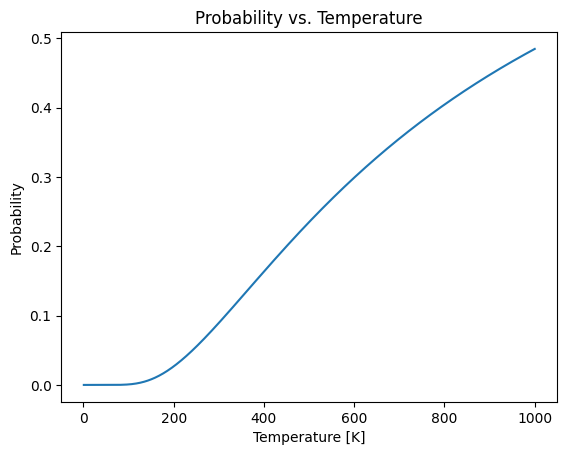

In [ ]:
def plot_probability_spin_configuration():
    kb = 1.38e-23
    E = 1e-20
    # Temperature in kelvin
    T = np.linspace(1, 1000, 1000)
    P = np.exp(-E/(kb * T))

    plt.plot(T,P)
    plt.xlabel("Temperature [K]")
    plt.ylabel("Probability")
    plt.title("Probability vs. Temperature")
    plt.show()

plot_probability_spin_configuration()

As we raise the system's temperature, the likelihood of spin flips occurring becomes higher. When the temperature reaches a sufficiently high level, it becomes less likely for all spins to align consistently. This phenomenon leads to a transition, as depicted in the images below. As you look from left to right, the temperature increases, and in the final image, you can observe the absence of any discernible structure.

<center>
<figure>
<img src="https://github.com/twhoekstra/criticality-and-cascades/blob/main/images/Ising%20model%20phase%20transition.png?raw=1" width=60%/>
<figcaption align = "center"><i> Idealized plot of some order paramter against some control parameter.</i></figcaption>
</figure>
</center>

A **phase transition** has occured, and you can clearly see which one of the states represent the **order** state and the **chaos** state.  
Now to find this point of criticality for our model or the critical temperature, we need to use some parameter to find this critical temperature.  
When magnetic dipole moments are aligned will this result in a strong overall magnetic field. When we lose this alignment we lose our magnetic field.  
Thus we can use magnetism ($M$) to find this critical temperature. The magnetization ($M$) can be expressed as follows:  
$$M = \frac{1}{N} \sum_i \langle\sigma_i\rangle$$  
Where N is the the total number of atoms, and $\sigma_i$ represents the spin at site $i$. The $\langle\rangle$ denote that we take the average of the spin sites.  
Below you can see how such a magnetism curve would looke like with increasing temperature.  
As you can see there is a steep transition from having magnetism to not having magnetism. When looking at phase transitions and you are trying to find this transition point you try to compare two parameters with each other.  
These are then called the order parameter and control parameter. In the Ising model the order parameter is magnetism and the control parameter is the temperature.

<center>
<figure>
<img src="https://github.com/twhoekstra/criticality-and-cascades/blob/main/images/Magnetism%20vs%20temp.png?raw=1" width=60%/>
<figcaption align = "center"><i> Plot of magnetism $M$ (the order parameter) against the temperature $T$, the control parameter.</i></figcaption>
</figure>

<figure>
<img src="https://github.com/twhoekstra/criticality-and-cascades/raw/main/images/order%20vs%20control%20parameters.png" width=60%/>
<figcaption align = "center"><i> Idealized plot of some order parameter against some control parameter.</i></figcaption>
</figure>
</center>

What the order and control parameters are in your brain is not really clear. We know that there are two different phases (up and down states), but how do we find criticallity then?

### The power law

Another way to find the criticality or critical point is to look at a power law relation.  
A power law is a mathematical relationship between two quantities, where a relative change in one quantity results in a relative change in the other quantity proportional to a power of the change.  
In other words, when one variable increases or decreases, the other variable responds in a manner determined by  an exponent or power.   
An easy example is the area of a square. If you were to double the length of its sides then the area will multiply by a factor of four.  This results in a power law of 2 between the variable length and area of a square.
$$
\mathrm{Area}_\mathrm{square} = L^2 \quad \text{when} \quad L \rightarrow 2L \quad \text{then} \quad (2L)^2 = 4L^2 = 4 \cdot \mathrm{Area}_\mathrm{square}
$$
Below you can run the code to see that there is a power law relation when the log-log plot of the variables is linear. The slope of the line in the log-log plot is also calculated, and you should be able to recover the power law exponent of 2.

The slope of the line in the log-log plot is 2.00


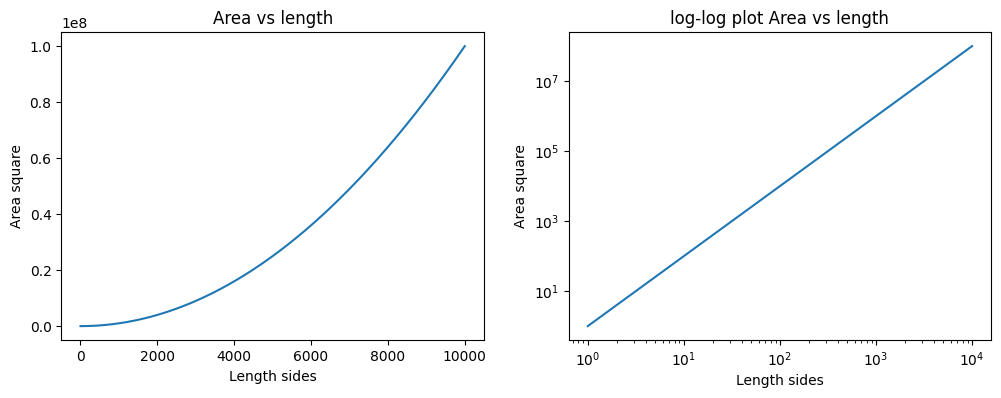

In [ ]:
def plot_area_length():
    L = np.linspace(1,10000,1000)
    A = L**2

    fig, ax = plt.subplots(1,2, figsize = (12,4))
    ax[0].plot(L,A)
    ax[1].loglog(L,A)
    ax[0].set(xlabel='Length sides', ylabel='Area square')
    ax[1].set(xlabel='Length sides', ylabel='Area square')
    ax[0].set_title("Area vs length")
    ax[1].set_title("log-log plot Area vs length")

    # Calculate the slope of the line in the log-log plot
    a, b = np.polyfit(np.log10(L), np.log10(A), 1)

    print(f'The slope of the line in the log-log plot is {a:.2f}')


plot_area_length()

In the Ising model if you plot the correlation length between two spins vs the temperature then you can find the power law.  
The correlation length between two spins represents the distance over which the flipping of one spin is correlated with the flipping of another spin.  
This correlation is shown in the first figure below.  
As you can see if the temperature is lower than the critical temperature is the correlation lenght low. However as we come closer to the critical temperature does the correlation length peak. Beyond the critical temperature does the correlation length decrease again.  
If we plot the correlation of all these spins against the distance and create a log-log plot, we observe a linear relationship, as demonstrated in the second figure below.
This linear relationship only counts when we take $T$ to be the critical temperature.  
You can see that this is true in the third figure below, as the lower temperature or higher temperature don't have an exponential relationship.

<center>
<figure>
<img src="https://github.com/twhoekstra/criticality-and-cascades/blob/main/images/Correlation%20length%20vs%20temp.png?raw=1" width=60%/>
<figcaption align = "center"><i> Correlation length plotted temperature. Note that the correlation length serves as an order parameter and the temperature as a control parameter. </i></figcaption>
</figure>

<figure>
<img src="https://github.com/twhoekstra/criticality-and-cascades/blob/main/images/Correlation%20vs%20distance%20log%20log%20.png?raw=1" width=60%/>
<figcaption align = "center"><i> Correlation plotted against distance in a log-log plot.</i></figcaption>
</figure>

<figure>
<img src="https://github.com/twhoekstra/criticality-and-cascades/blob/main/images/Correlation%20vs%20distance.png?raw=1" width=60%/>
<figcaption align = "center"><i> Correlation plotted against distance in a linear plot.</i></figcaption>
</figure>
</center>

### Up and down states in the cerebral cortex
What are up and down states in the brain?  
The up state is a period of increased neural activity and excitation. This looks like spikes rapidly firing one after another like you can see in the figure below in B.  
The down state it looks like there is no spiking activity from the neurons. This is visualized in the figure below in A.  
Another group is going to explain some more how these up and down states arise and what they are in a biological context. We are going to focus more on the criticality and cascades of the brain.

<center>
<figure>
<img src="https://github.com/twhoekstra/criticality-and-cascades/blob/main/images/Up%20and%20down%20state.png?raw=1" width=60%/>
<figcaption align = "center"><i> Up and down states in the cortex.</i></figcaption>
</figure>
</center>

### Critical cascades in your brain

Neuronal avalanches, coined by John M. Beggs and Dietmar Plenz in 2003 [1], describe critical cascades in neurons.  
Using an 8x8 multielectrode array (as depicted in the first figure), they monitored rat somatosensory cortex spiking activity.  
The emerging pattern involves a few neurons randomly firing, triggering others to activate. This domino effect continues, creating a cascade of neuron firing until all neurons are active simultaneously.  
However, since neurons can't fire in close succession, the firing quickly subsides, resulting in the observed neuronal avalanche pattern (as shown in the second figure).

<center>
<figure>
<img src="https://github.com/twhoekstra/criticality-and-cascades/blob/main/images/2003%20paper.png?raw=1" width=75%/>
<figcaption align = "center"><i> Power laws show up in somatosensory cortex spiking activity. Adapted from Beggs & Plenz, 2003. </i></figcaption>
</figure>

<figure>
<img src="https://github.com/twhoekstra/criticality-and-cascades/blob/main/images/Avalanche%20pattern.png?raw=1" width=60%/>
<figcaption align = "center"><i> Avalanches in our model. </i></figcaption>
</figure>
</center>

John and Dietmar generated log-log plots correlating the probability of an avalanche occurrence with various avalanche sizes, revealing the presence of power laws (as show in the figure below).

<center>
<figure>
<img src="https://github.com/twhoekstra/criticality-and-cascades/blob/main/images/power%20law%202003.png?raw=1" width=100%>
<figcaption align = "center"><i> Image power laws. Adapted from Beggs & Plenz, 2003. </i></figcaption>
</figure>
</center>



The abundance of power laws suggest that the rat cortex exhibits criticality (or that it is near the point of phase transition), the question arises: which factor determines whether the cortex transitions into an up state or a down state?

### The equilibrium parameter

The equilibrium or control parameter in the context of neurons is the weight assigned between them.  
When one neuron activates and forms a connection with another, the signal is transmitted between them. This signal is then multiplied by the weight, either amplifying or diminishing the signal between the neurons.  
Increasing the connection weights raises the likelihood of a random neuron activation initiating a neuronal avalanche.  
Reducing the weight decreases the likelihood of a random neurons activating to trigger a neuronal avalanche.  
If we plot the number of spikes of the neurons against the time (as you can see in the figures below) you can clearly see that you shift triggering no neuronal avalanches to activating some every few time steps, as the weight increases.  

In general when the control parameter is below the critical value your system is in a subcritical state. If the parameter is at the critical value you system is in critical state and when the parameter is above the critical value your system is in supercritical state.
All these states are shown in the figure below.

<div style="display: flex;">
  <div s>
    <img src="https://github.com/twhoekstra/criticality-and-cascades/blob/main/images/sub%20critical%20weight.png?raw=1" width=30%><img src="https://github.com/twhoekstra/criticality-and-cascades/blob/main/images/critical%20weight.png?raw=1" width=30%> <img src="https://github.com/twhoekstra/criticality-and-cascades/blob/main/images/supercritical%20weight.png?raw=1" width=30%">
</div>


## A model for critical cascades

### Why make computer model?

These phenomena in the cortex lend themselves to research *in-silico*, using computers to simulated groups of neurons. Such simulations allow researchers precise control over various parameters, such as the number of neurons, how they are connected, and the strength of those connections. Using this control, these parameters can be precisely manipulated investigate how they influence the occurrence, propagation, and characteristics of criticality. As you might know, such control is difficult to achieve in biological experiments.

One of the main goals for researchers in this field is the development of mathematical models and theories about neural processes like the emergence of critical cascades. Simulations provide a means to rigorously test these hypotheses and models. By creating computational models based on their theoretical understanding of neural avalanches, researchers can validate their model by comparing their predictions to the real thing. Such models often allow for much deeper insights into the dynamics of neural avalanches.

### The Leaky Integrate and Fire Neuron
There are various types artificial neural network one category being **spiking neural networks (SNNs)**. These networks model the behavior of individual neurons and their interactions through action potentials or **spikes**, similar to real neurons in the brain.

**Leaky Integrate and Fire (LIF)** neurons are a type of biological neuron model used to build SNNs. LIF neurons are frequently employed in research due to their simplicity and ability to capture essential neural dynamics. LIF neurons operate by continuously integrating incoming electrical signals over time, with a gradual leakage of charge. When the accumulated charge reaches a predefined firing threshold, the neuron generates a spike, representing the firing of an action potential. Following a spike, the neuron resets, simulating the refractory period observed in real neurons.

> <p style="color:blue;"><font size="3"> 🖥️ Demo  </font></p>
>
> The code below defines a working LIF neuron written and simulated using the [Brain Simulator](https://briansimulator.org/) package. Run the code below to setup a single LIF neuron, which recieves an input pulse at 20, 60, and 80 m.

In [ ]:
defaultclock.dt = 0.1 * ms

neuron = NeuronGroup(1,
                      """
                      dv/dt = -v/tau : volt (unless refractory)
                      """,
                      threshold="v > theta",
                      reset="v = V_r",
                      refractory=2 * ms,
                      method="exact",
)

# Input spike paramaters
times = array([20, 60, 80]) * ms

inp = SpikeGeneratorGroup(1,np.zeros_like(times), times)
input_synapse = Synapses(inp, neuron, on_pre="v += strength", delay=0 * ms)
input_synapse.connect()

# Record voltage
voltage_monitor = StateMonitor(neuron, 'v', record=True)

store()

> <p style="color:blue;"><font size="3"> 🖥️ Demo  </font></p>
>
> The code above only needs to be run once. The model is stored using the `store` function in the last line of the code above. Now, using the code below, the model is given parameters and simulated for 100 ms, after which the three resulting spikes are plotted. Note that the parameter `strength` can be changed, changing the strength of the pulses applied to the neuron. Try increasing and decreasing this value. Also consider comparing it to `theta`, i.e. what happens if `strength` > `theta` and vice-versa?

Text(0, 0.5, 'Voltage [mV]')

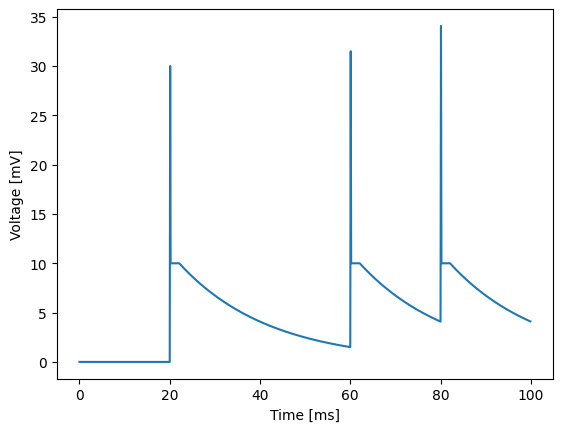

In [ ]:
# neuron parameters
tau = 20 * ms
theta = 20 * mV
V_r = 10 * mV

# Input parameters
strength = 30 * mV

restore()

# Run for 100 ms
run(100 * ms)

plt.plot(voltage_monitor.t / ms, voltage_monitor.v.T / mV)
plt.xlabel('Time [ms]')
plt.ylabel('Voltage [mV]')


LIF neurons are favored in research because of their computational efficiency and mathematical tractability, which make them suitable for simulating large-scale neural networks and studying fundamental principles of information processing. By adjusting parameters like the leak rate and firing threshold, LIF neurons can be fine-tuned to reproduce various neural behaviors. These neurons can then be assembled into networks can perform tasks ranging from signal processing, to memory storage, and pattern recognition, offering insights into the computational capabilities of the brain.

### Recurrent Neural Networks
<div>
<center>
<figure>
<img src="https://github.com/twhoekstra/criticality-and-cascades/blob/main/images/recurrent_neural_network_kanders.png?raw=1" width=60%">
<figcaption align = "center"><i> Recurrent Neural Network. Adapted from Kanders et. al. </i></figcaption>
</figure>
</center>
</div>

To model criticality in the cortex, the spiking neurons need to be arranged in a network. Researchers often opt for **Recurrent Neural Networks (RNNs)**. In an RNN, neurons are allowed to be arranged into feedback loops and have recurrent connections. Such **Spiking Recurrent Neural Networks (SRNNs)** have the advantage that they simplify the brain's complexity making certain neurocomputational studies tractable. Naturally, such SRNNs are not a perfect model for all the intricacies of the cortex.

## Our model

### Parameters

Our model is inspired by the work of Kanders et. al. [2]. It consits of LIF neurons connected by a randomized set of synapses. Most of the important features of the network are listed below:
- The number of neurons in the network $N$ is 1000.
- The network consists of both **excitatory** and **inhibitory** neurons in a ratio $\gamma$ of 80%-20%.
- The inhibitory synapses are stronger that the excitatory synapses by a factor $g$ which is set to 3.
- The probability of two neurons being connected, $p_c$ is 4%. This makes the network **sparse**.
- Self-connections are not allowed.
- A single excitatory neuron is selected to be the **leader neuron**. This neuron will spike at a rate of 100 Hz.
- The membrane potential (voltage) of all neurons are subject to background noise.

Creating this network in Brian can be a hassle. To make this more convenient, we've built a Python class that takes care of a lot of the messy details. The code for this is put in the `utils` folder and can be imported via:

In [ ]:
from utils.simulate import RecurrentNeuralNetwork

The inner workings of this `RecurrentNeuralNetwork` class can be checked out in the files themselves or this projects [GitHub repository](https://github.com/twhoekstra/criticality-and-cascades).

To create a network, simpy run:

In [ ]:
rnn = RecurrentNeuralNetwork()

To get more information on how to use the class, run:

In [ ]:
help(RecurrentNeuralNetwork)

Help on class RecurrentNeuralNetwork in module utils.simulate:

class RecurrentNeuralNetwork(builtins.object)
 |  RecurrentNeuralNetwork(n: int = 1000, w: float = 10, g: float = 3, p_c: float = 0.04, gamma=0.8, p_ext: float = 0.0006, seed: int = None, leader_rate: float = 100, timestep_ms: float = 0.1)
 |  
 |  Recurrent Neural Network of LIF neurons.
 |  
 |  Recurrent Neural Network (RNN) of Leaky-Integrate-and-Fire (LIF) neurons.
 |  Simulation based on Brunel, N. 2000 example of the ``brian2`` Python
 |  package: https://brian2.readthedocs.io/en/stable/examples/frompapers.Brunel_2000.html#example-brunel-2000
 |  
 |  Experimental setup inspired by "Avalanche and edge-of-chaos criticality do
 |  not necessarily co-occur in neural networks" by Kanders et. al.:
 |  https://doi.org/10.1063/1.4978998
 |  
 |  The recurrent neural network has excitatory in inhibitory neurons. There
 |  are no self-connections.
 |  
 |  Attributes:
 |      tau: LIF neuron time constant.
 |      theta: LIF

### Visualizating synapses

We'll redefine the network to have 50 neurons by recreating it and setting $N$ to 50. This amount of neurons is chosen as it is easier to visualize. We built the `plot_connectivity()` method, that plots the connections between the neurons in an instance of the `RecurrentNeuralNetwork` class.

(<Figure size 640x480 with 2 Axes>,
 array([<Axes: ylabel='Neuron index'>,
        <Axes: xlabel='Source index', ylabel='Target index'>], dtype=object))

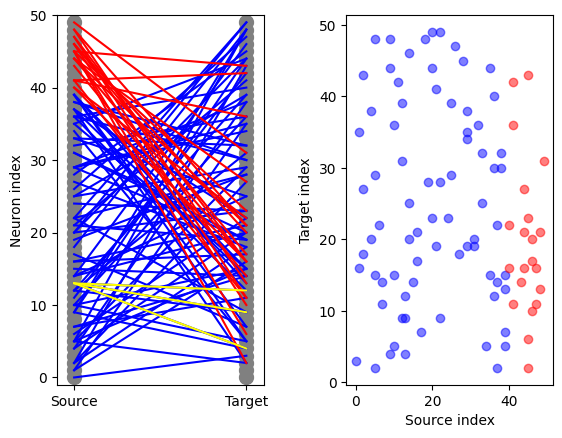

In [ ]:
rnn = RecurrentNeuralNetwork(n=50, seed=None)
rnn.plot_connectivity()

Two plots are created. The graph on the left is a **directed graph** where nodes represent neurons, and directed lines or **edges** represent the connections between them. Neurons sending signals are shown to the left of this plot and are connected via an edge to their recipient neuron on the right of the plot. Blue edges represent excitatory synapses, while red edges represent inhibitory synapses. Yellow edges belong to the leader neuron. Note that because there are no self-connections, there are no horizontal lines.

The plot on the right is **connectivity matrix**, where the rows and columns correspond to neurons in a network. Each dot in the matrix indicates the presence of a synaptic connection between a pair of neurons. The columns of the matrix represent the neurons who are the sources of a synaptic connection, while the rows of the matrix represent the neurons recieving those connections. Blue dots represent excitatory connections, while red dots represent inhibitory connections.  Note that because there are no self-connections, can be no dots on the diagonal of this matrix.

> <p style="color:blue;"><font size="3"> 🖥️ Demo  </font></p>
>
> Rerun the code above. You should be able to notice that each time you recreate `rnn`, the network is different. This because a new network is randomly generated each time. This is the case when the optional parameter `seed` is not used or set to `None`. Try setting `seed` to an integer, i.e. `seed=0`. After having done so, the network stays the same even though the code is re-run. This is useful for reproducing data.

### Running the model

Let's create and run a model. First, we'll create a default  using our class. The only parameter specified is `seed`, for reproducibilty. By using the `store()` method, the simulations will run faster later, as some information in the network will not have to be re-created again.

In [ ]:
rnn = RecurrentNeuralNetwork(seed=0)
rnn.store()

Before we run, we are going to set an important parameter: the weight scaling $W$. The strength of the synapses in `RecurrentNeuralNetwork` are set to an arbitrary value and can be scaled using $W$. Changing $W$ will have an equal effect on all excitatory and inhibitory neurons: the exciatory synapses will confer a stronger excitation, and the inhibitory synapses a stronger inhibition. A higher $W$ will lead to stronger connections throughout the model, and vice-versa.

Let's start with $W=5$. Setting $W$ in the model is done using the method `set_w(W)`. The model can then be simualted using the method `sim(t)`, where `t` is the runtime in milliseconds. Note that `restore()` is used to "load" the data we stored in the cell above.

In [ ]:
rnn.restore()
rnn.set_w(5)
rnn.sim(1200)

Starting simulation at t=0. s for a duration of 1.2 s
1.2 s (100%) simulated in < 1s


1

For your convience, we've included some functions to visulize the results.

(<Figure size 640x480 with 2 Axes>,
 array([<Axes: ylabel='Neuron'>,
        <Axes: xlabel='Time [ms]', ylabel='Voltage [mV]'>], dtype=object))

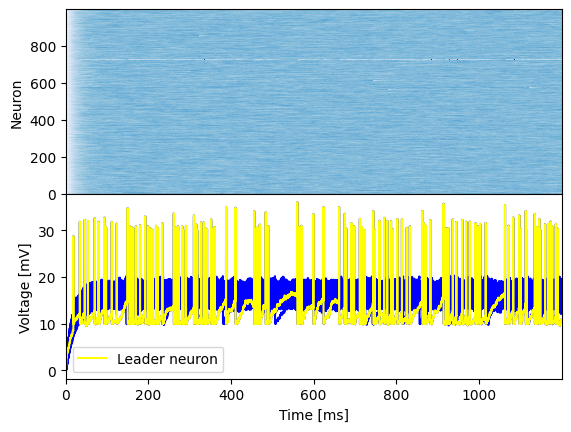

In [ ]:
rnn.plot_voltage()

Note that it takes a while to plot the voltage traces, so it is often better to record and plot just spikes:

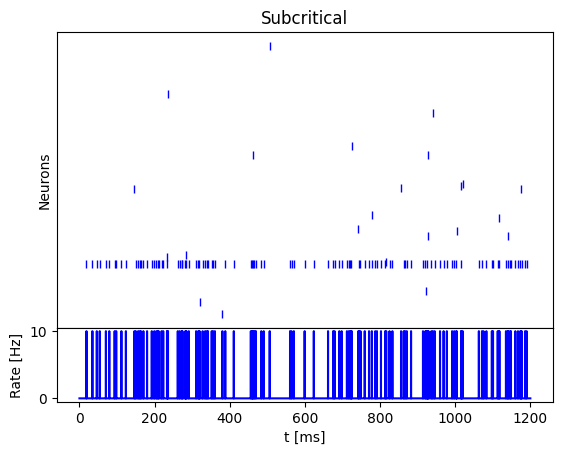

In [ ]:
_, axs = rnn.plot_spikes()
axs[0].set_title('Subcritical')
None

### Subcriticality, at criticality and supercriticality.

You'll have probably noticed the leader neuron is active as it should be, but the rest of the network is only spiking occasionally. This because our choice of $W$ is rather low. Specifically, the system is below criticality, i.e. **subcritical**. Note that our analysis $W$ serves as the **control parameter**. The network can be put in a **supercritical** state by setting $W$ to a higher value, say $W=12$:

Starting simulation at t=0. s for a duration of 1.2 s
1.2 s (100%) simulated in < 1s


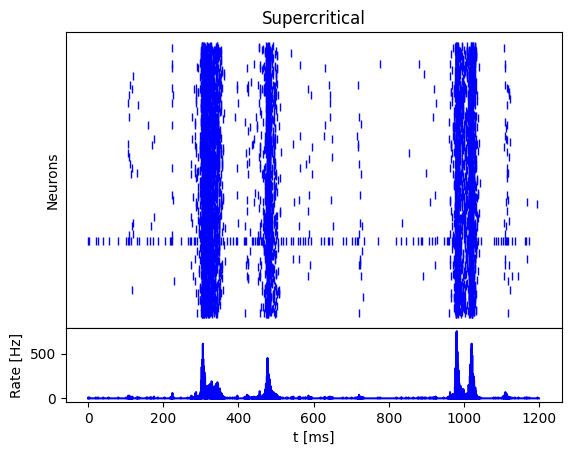

In [ ]:
rnn.restore()
rnn.set_w(12)
rnn.sim(1200)

_, axs = rnn.plot_spikes()
axs[0].set_title('Supercritical')
None

> <p style="color:blue;"><font size="3"> 🖥️ Demo  </font></p>
>
> Rerun the code below. See if the value set for $W$ is close to criticality or not.

Starting simulation at t=0. s for a duration of 1.2 s
1.2 s (100%) simulated in < 1s


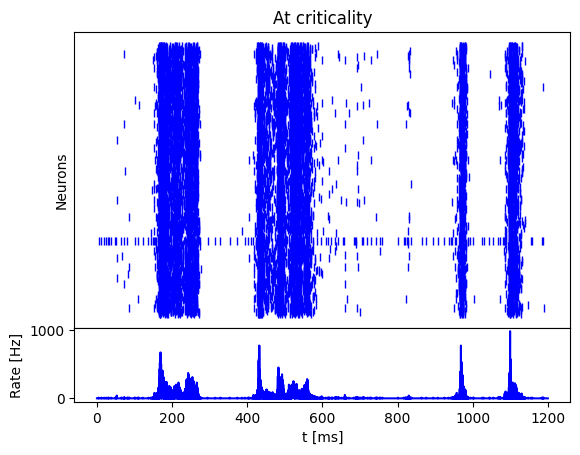

In [ ]:
rnn.restore()
rnn.set_w(9.9)
rnn.sim(1200)

_, axs = rnn.plot_spikes()
axs[0].set_title('At criticality')
None

> <p style="color:blue;"><font size="3"> 🖥️ Demo  </font></p>
>
> There are many other parameters that can be changed in `RecurrentNeuralNetwork`, check them out using the `help()` function! These offer many more options for experimentation, so let your curiosity run wild!

### Power laws

Having found an $W$ which is likely to be near the critical weight $W_c$, from theory, we should expect to be able to find some kind of power law relation. One such relation brought to our attention in Kanders et. al. [2] is related to the frequency of avalances of a certain size.

The relation is as such: any run of the simulation can be split or "binned" into small time segment of duration $\Delta_t$. For each such section, the **avalanche size** $S$ is defined as the total number of spikes occuring in that window. All avalance sizes $S$ in during the run, their occurence or **count** is determined. These measures are plotted on a log-log scale with the avalanche sizes on the x-axis and with their respectived counts on the y-axis. At $W_c$, this plot should yield a rougly linear relation, revealing a power law:

$$P(S) \propto S^{-α}$$

<center>
<figure>
<img src="https://github.com/twhoekstra/criticality-and-cascades/raw/main/images/power%20law%20kanders.png" width=90%">
<figcaption align = "center"><i> Power law for $S$ and counts. From Kanders et. al. </i></figcaption>
</figure>
</center>

To make finding critical exponents more convenient, we have included two methods. The first is `get_spike_distribution()` which automatically calculates $S$ and its counts from the spike data of the simulation. It has a paramter `delta_t_ms` with which the binning can be set. It returns a tuple containing $S$ and the counts of each $S$ respectively.

In [ ]:
rnn.get_spike_distribution(delta_t_ms=1)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  72,  73,  75,  77,  79,  81,  82,
         87,  90,  91,  95,  96,  99, 101, 103, 107, 110, 113, 122, 124,
        128, 132, 136, 138, 144, 149, 157, 201, 220, 224]),
 array([639, 131,  44,  13,  14,  17,   5,   8,   6,   7,   7,   6,  10,
          7,  10,   9,   6,   6,   6,   5,   5,   4,   4,   6,   3,   5,
          7,   7,   8,   3,   6,   4,   7,   4,   1,   5,   4,   4,   5,
          3,   4,   4,   2,   9,   3,   3,   1,   2,   2,   3,   3,   1,
          7,   2,   4,   5,   8,   2,   1,   1,   4,   1,   2,   4,   3,
          1,   3,   1,   5,   3,   1,   1,   1,   3,   1,   1,  

Another useful method is `plot_spike_distribution()`, which will do the calculations above and plot it in a log-log figure, along with a (rudementary) linear fit and estimation of the critical parameter.

Sometimes the results vary a lot from the work of Kanders et. al. We mainly attribute this to the fact that this a singular, very short run of the model. Finding such critical exponents is ideally done with the averaged data from many different (and longer) runs.

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='S [spikes]', ylabel='counts'>)

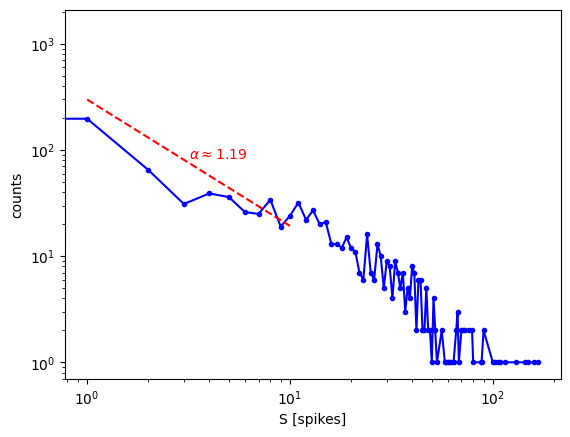

In [ ]:
rnn.plot_spike_distribution()

> <p style="color:blue;"><font size="3"> 🖥️ Demo  </font></p>
>
> The code above was run for the run of the model at criticality. It is also worth trying for the sub- and supercritical case.

### Various weights

The process mentioned above can of course also be done programmaticaly. By sweeping through various values of $W$ and plotting the $S$-count diagram, we might be able to find the critical point by looking for the expected linearity at $W_c$:

In [ ]:
w_s = np.linspace(6, 10, num=20)

spike_counts = []
rates = []

num_reruns_per_w = 5

rnn2 = RecurrentNeuralNetwork(record_voltage=False)
rnn2.store()

for w in w_s:

    print(f'Simulating W={w:.2f}')


    rnn2.restore()
    rnn2.set_w(w)
    rnn2.sim(2000, silent=True)

    spikes, counts = rnn2.get_spike_distribution()
    rates.append(np.unique(rnn2.rate_results.rate))

    spike_counts.append([spikes, counts])

Simulating W=6.00
Simulating W=6.21
Simulating W=6.42
Simulating W=6.63
Simulating W=6.84
Simulating W=7.05
Simulating W=7.26
Simulating W=7.47
Simulating W=7.68
Simulating W=7.89
Simulating W=8.11
Simulating W=8.32
Simulating W=8.53
Simulating W=8.74
Simulating W=8.95
Simulating W=9.16
Simulating W=9.37
Simulating W=9.58
Simulating W=9.79
Simulating W=10.00


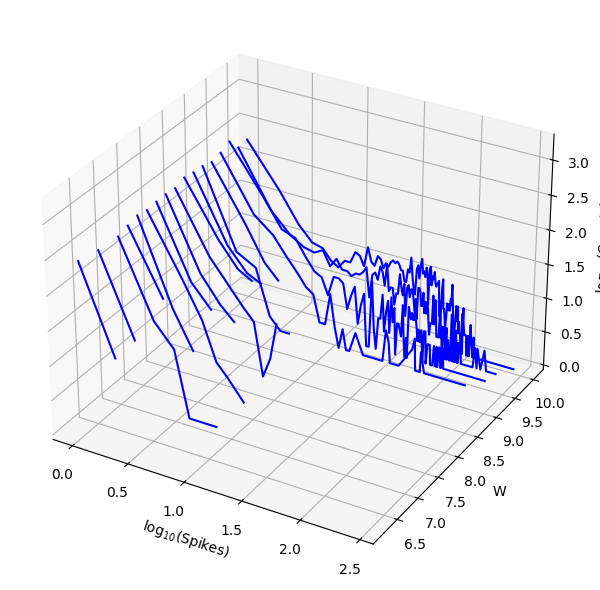

In [ ]:
ax = plt.figure(figsize=(6,30)).add_subplot(projection='3d')

for w, (spikes, counts) in zip(w_s, spike_counts):
    ax.plot(np.log10(spikes), np.log10(counts), zs=w, zdir='y', c='b')

ax.set_xlabel('$\mathrm{log}_{10}(\mathrm{Spikes})$')
ax.set_ylabel('W')
ax.set_zlabel('$\mathrm{log}_{10}(\mathrm{Counts})$')

plt.tight_layout()

Such a sweep through $W$, seems to deliver results that adequately match that in literature. For example, we observe that for $W < W_c$ the magnitude of the noise on the tail of the distribution seems to diminish. The main point of improvement left here is improving the fidelity of this plot. This can be achieved by sampling more spikes, i.e. running longer simulations or adding the contributions of many repeats. The latter would be our preffered course of action.

Another method we tried for finding the critical point is by drawing a "bifurcation diagram -esque" plot in which for each value of $W$, the unique spiking rates are plotted. Here, we observe a step-like change around $9 < W < 10$, indicating that something interesting is going on for these values of $W$, which might hint at a critical value for $W_c$.

Text(0.5, 1.0, 'Plot of unique spiking frequencies for various W')

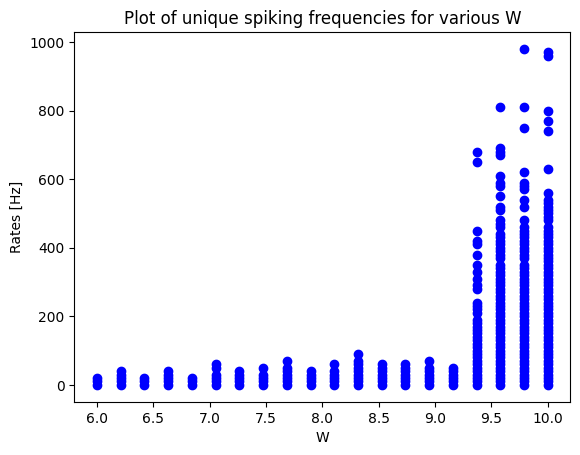

In [ ]:
fig, ax = plt.subplots(1, 1)

for w, rs in zip(w_s, rates):
  ax.plot(np.full_like(rs, w), rs, 'ob')

ax.set_ylabel('Rates [Hz]')
ax.set_xlabel('W')
ax.set_title('Plot of unique spiking frequencies for various W')

## Conclusion and Discussion

Biological systems, like the brain cortex are though to operate at or near criticality, reffering to the state of being near a transition between order an chaos. The notion of criticality is a motif in nature, and also pops in the physics of phase transitions, which can act as a metaphor to understand criticality in the brain.

By modeling parts of the brain using computationally efficient LIF neurons, arranged in biologically-plausible RNNs, hypotheses and intuitions can be created to understand criticality. This report allows for an interactive exploration of these networks above, below, and at criticality.

Finding these critical points is easy for some systems but can be rather complex for others, like the networks mentioned here. What makes criticality recognizable is the emergence of power laws.

## References

[1] Beggs, J. M., & Plenz, D. (2003). [Neuronal avalanches in neocortical circuits.](https://www.jneurosci.org/content/23/35/11167) Journal of neuroscience, 23(35), 11167-11177.

[2] Kanders, K., Lorimer, T., & Stoop, R. (2017). [Avalanche and edge-of-chaos criticality do not necessarily co-occur in neural networks.](https://pubs.aip.org/aip/cha/article/27/4/047408/322534/Avalanche-and-edge-of-chaos-criticality-do-not) Chaos: An Interdisciplinary Journal of Nonlinear Science, 27(4).

[3] Holcman, D., & Tsodyks, M. (2006). The emergence of up and down states in cortical networks. PLoS computational biology, 2(3), e23.

## AI Statement

Wilco used ChatGPT to help clarify his thoughts and wording of some of the concepts. It was also predominantly used for LaTeX integration into Markdown. He never copied output of chatgpt one to one, as ChatGPT is a good tool, but it is not smart. Below are the links of the chat histories used.

- [Chat History 1](https://chat.openai.com/share/b0b4cd6c-9650-4729-ab47-5b3b0ec815d9)
- [Chat History 2](https://chat.openai.com/share/e84f878e-fd35-4ca4-90eb-ac0cd8282b10)
- [Chat History 3](https://chat.openai.com/share/e84a024d-a839-4878-8eb6-df053fcb56c8)

Thijn used ChatGPT for some input on the text in the notebook. Sometimes ChatGPT proved useful in this sense but for some specific topics inaccuracies pop up. The chat history can be found below:

- [Chat History 1](https://chat.openai.com/share/35092ad4-dd7b-49ce-a7e9-6d43fa211ba6)

## Code

The code for this assignment, including the helper class and functions can be found on our [GitHub repository](https://github.com/twhoekstra/criticality-and-cascades) for this project.

## Acknowledgements

Thanks to Mario, Tamara, and Francesco for giving us some great pointers on where to dive into this subject.